In [1]:
!pip install jugaad-data nselib

In [2]:
import jugaad_data as jd
print(f'jugaad_data version: {jd.__version__}')

jugaad_data version: 0.26


In [3]:
!pip install pandas-market-calendars


In [4]:
#Imports and Version Checks


import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from sklearn.linear_model import LinearRegression
import yfinance as yf
import jugaad_data as jd
from jugaad_data.nse import NSELive, index_raw, stock_df
from nselib import capital_market

print(f'jugaad_data version: {jd.__version__}')
print(f'yfinance version: {yf.__version__}')

jugaad_data version: 0.26
yfinance version: 0.2.61


In [5]:
# Live NIFTY 50 Quote

import yfinance as yf

nifty = yf.Ticker("^NSEI")  # NIFTY 50
data = nifty.history(period="1d", interval="1m")
print(data.tail())


                                   Open          High           Low  \
Datetime                                                              
2025-06-03 15:25:00+05:30  24532.849609  24539.550781  24531.300781   
2025-06-03 15:26:00+05:30  24534.599609  24538.750000  24532.000000   
2025-06-03 15:27:00+05:30  24534.949219  24536.000000  24530.400391   
2025-06-03 15:28:00+05:30  24532.599609  24536.550781  24529.599609   
2025-06-03 15:29:00+05:30  24535.800781  24538.400391  24530.500000   

                                  Close  Volume  Dividends  Stock Splits  
Datetime                                                                  
2025-06-03 15:25:00+05:30  24534.449219       0        0.0           0.0  
2025-06-03 15:26:00+05:30  24534.750000       0        0.0           0.0  
2025-06-03 15:27:00+05:30  24532.250000       0        0.0           0.0  
2025-06-03 15:28:00+05:30  24533.250000       0        0.0           0.0  
2025-06-03 15:29:00+05:30  24538.400391       0     

In [6]:
#Fetch and Plot Nifty Midcap 150 (5-year span)


from nselib import capital_market
import pandas as pd
import matplotlib.pyplot as plt

time_periods = [('06-05-2019', '04-05-2021'), ('05-05-2021', '03-05-2024')]
index_data = pd.DataFrame()

for from_date_str, to_date_str in time_periods:
    try:
        temp = capital_market.index_data(index='NIFTY MIDCAP 150', from_date=from_date_str, to_date=to_date_str)
        temp['TIMESTAMP'] = pd.to_datetime(temp['TIMESTAMP'], format='%d-%m-%Y')
        index_data = pd.concat([index_data, temp])
    except Exception as e:
        print(f"❌ Failed to fetch data from {from_date_str} to {to_date_str}: {e}")

if not index_data.empty:
    index_data = index_data.sort_values('TIMESTAMP').reset_index(drop=True)

    plt.figure(figsize=(12, 6))
    plt.plot(index_data['TIMESTAMP'], index_data['CLOSE_INDEX_VAL'], color='green')
    plt.title('Nifty Midcap 150')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.tight_layout()
    plt.show()
else:
    print("❗No data to plot.")


❌ Failed to fetch data from 06-05-2019 to 04-05-2021:  Resource not available MSG: Expecting value: line 1 column 1 (char 0)
❌ Failed to fetch data from 05-05-2021 to 03-05-2024:  Resource not available MSG: Expecting value: line 1 column 1 (char 0)
❗No data to plot.


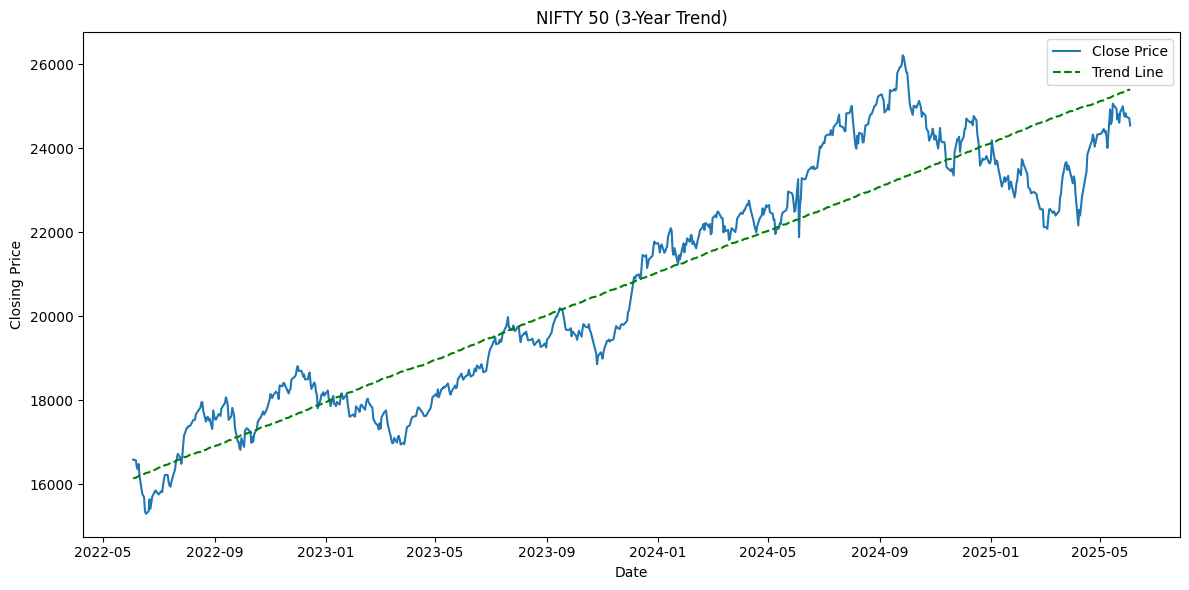

In [7]:
# Fetch 3-Year Historical Data for NIFTY 50
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import yfinance as yf

# Fetch 3 years of NIFTY 50 data
nifty = yf.Ticker("^NSEI")  # Yahoo Finance symbol for NIFTY 50
nifty_df = nifty.history(period="3y")
nifty_df = nifty_df.reset_index()

# Drop rows with missing values
nifty_df = nifty_df.dropna(subset=["Close"])

# Plot NIFTY 50 trend
plt.figure(figsize=(12, 6))
plt.plot(nifty_df['Date'], nifty_df['Close'], label='Close Price')

# Linear Trend Line
x = np.arange(len(nifty_df)).reshape(-1, 1)
y = nifty_df['Close'].values.reshape(-1, 1)
trend = LinearRegression().fit(x, y).predict(x)
plt.plot(nifty_df['Date'], trend, '--', color='g', label='Trend Line')

plt.title('NIFTY 50 (3-Year Trend)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.tight_layout()
plt.show()



In [8]:
#Get Live Prices for Individual Stocks/ETFs
import yfinance as yf

# Fetch latest quote data
tickers = {
    "TATAMOTORS": "TATAMOTORS.NS",
    "MON100": "MON100.NS"  # Assuming listed on NSE
}

for name, symbol in tickers.items():
    ticker = yf.Ticker(symbol)
    price = ticker.history(period='1d')['Close'].iloc[-1]
    print(f"{name}: ₹{price:.2f}")


TATAMOTORS: ₹703.85
MON100: ₹179.56


In [9]:
#TATA Motors Historical (Short Window via jugaad_data)

import yfinance as yf

# Fetch historical data
df_tata = yf.download('TATAMOTORS.NS', start='2023-01-01', end='2023-01-06')  # end is exclusive
print(df_tata.head())


[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True
Price              Close          High           Low          Open  \
Ticker     TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS   
Date                                                                 
2023-01-02    392.362518    393.555122    388.585991    390.076730   
2023-01-03    391.468109    395.890648    390.573672    393.555150   
2023-01-04    383.219360    392.362543    382.623059    392.362543   
2023-01-05    384.511322    386.349906    380.138493    385.505148   

Price             Volume  
Ticker     TATAMOTORS.NS  
Date                      
2023-01-02      10501357  
2023-01-03       9431220  
2023-01-04      16121049  
2023-01-05      10443908  


In [10]:
#TATA Motors via yfinance (Better for longer range)
tata_data = yf.download('TATAMOTORS.NS', start='2023-01-01', end='2023-01-06')
print(tata_data.head())

info = yf.Ticker('TATAMOTORS.NS').info
print("Shares Outstanding:", info['sharesOutstanding'])
print("Float Shares:", info['floatShares'])
print("Current Price:", info['currentPrice'])


[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open  \
Ticker     TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS   
Date                                                                 
2023-01-02    392.362518    393.555122    388.585991    390.076730   
2023-01-03    391.468109    395.890648    390.573672    393.555150   
2023-01-04    383.219360    392.362543    382.623059    392.362543   
2023-01-05    384.511322    386.349906    380.138493    385.505148   

Price             Volume  
Ticker     TATAMOTORS.NS  
Date                      
2023-01-02      10501357  
2023-01-03       9431220  
2023-01-04      16121049  
2023-01-05      10443908  


Shares Outstanding: 3681459968
Float Shares: 3436244543
Current Price: 703.85


In [11]:
#Get List of NIFTY 50 Stocks
nifty_50_symbols = [
    "ADANIPORTS.NS", "ASIANPAINT.NS", "AXISBANK.NS", "BAJAJ-AUTO.NS", "BAJFINANCE.NS",
    "BAJAJFINSV.NS", "BHARTIARTL.NS", "BPCL.NS", "BRITANNIA.NS", "CIPLA.NS",
    "COALINDIA.NS", "DIVISLAB.NS", "DRREDDY.NS", "EICHERMOT.NS", "GRASIM.NS",
    "HCLTECH.NS", "HDFCBANK.NS", "HDFCLIFE.NS", "HEROMOTOCO.NS", "HINDALCO.NS",
    "HINDUNILVR.NS", "ICICIBANK.NS", "INDUSINDBK.NS", "INFY.NS", "ITC.NS",
    "JSWSTEEL.NS", "KOTAKBANK.NS", "LT.NS", "M&M.NS", "MARUTI.NS",
    "NESTLEIND.NS", "NTPC.NS", "ONGC.NS", "POWERGRID.NS", "RELIANCE.NS",
    "SBILIFE.NS", "SBIN.NS", "SUNPHARMA.NS", "TATACONSUM.NS", "TATAMOTORS.NS",
    "TATASTEEL.NS", "TCS.NS", "TECHM.NS", "TITAN.NS", "ULTRACEMCO.NS",
    "UPL.NS", "WIPRO.NS"
]



In [12]:
#Fetch Yesterday and Day-Before Data (2-Day Window)
from datetime import date, timedelta
from jugaad_data.nse import stock_df
import pandas as pd

yesterday = date.today() - timedelta(days=1)
day_before = date.today() - timedelta(days=2)

# Account for weekends
while yesterday.weekday() > 4:  # Sat/Sun
    yesterday -= timedelta(days=1)
    day_before -= timedelta(days=1)

gain_count = 0
loss_count = 0
unchanged_count = 0
results = []

for symbol in tickers:
    try:
        df = stock_df(symbol=symbol, from_date=day_before, to_date=yesterday, series="EQ")
        df = df.sort_values("DATE1")
        if len(df) == 2:
            prev_close = df.iloc[0]["CLOSE_PRICE"]
            curr_close = df.iloc[1]["CLOSE_PRICE"]
            change = curr_close - prev_close
            status = "GAIN" if change > 0 else "LOSS" if change < 0 else "UNCHANGED"
            results.append((symbol, prev_close, curr_close, change, status))
            if change > 0:
                gain_count += 1
            elif change < 0:
                loss_count += 1
            else:
                unchanged_count += 1
    except Exception as e:
        print(f"Error fetching {symbol}: {e}")


Error fetching TATAMOTORS: Expecting value: line 1 column 1 (char 0)
Error fetching MON100: Expecting value: line 1 column 1 (char 0)


In [13]:
#Display Summary
print(f"📈 Gainers: {gain_count}")
print(f"📉 Losers: {loss_count}")
print(f"⏸️ Unchanged: {unchanged_count}")

summary_df = pd.DataFrame(results, columns=['Symbol', 'Prev Close', 'Curr Close', 'Change', 'Status'])
summary_df.sort_values(by="Change", ascending=False).head(10)  # Top 10 gainers


📈 Gainers: 0
📉 Losers: 0
⏸️ Unchanged: 0


,Symbol,Prev Close,Curr Close,Change,Status


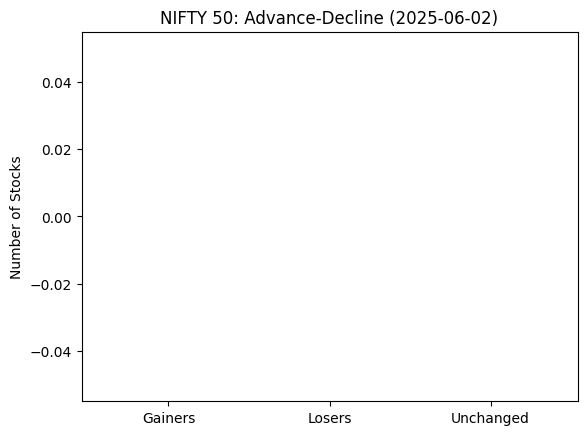

In [14]:
import matplotlib.pyplot as plt

plt.bar(['Gainers', 'Losers', 'Unchanged'], [gain_count, loss_count, unchanged_count], color=['green', 'red', 'gray'])
plt.title(f'NIFTY 50: Advance-Decline ({yesterday})')
plt.ylabel('Number of Stocks')
plt.show()
